## Credit Card Fraud Detection

In this notebook, we study the problem of credit card fraud detection using a real-world dataset characterized by extreme class imbalance. The objective is to build and evaluate machine learning models capable of identifying fraudulent transactions while taking into account the strong constraints of this type of problem. Throughout the notebook, we progressively explore baseline models, ensemble methods, and more advanced algorithms, while carefully justifying our preprocessing choices, evaluation metrics, and modeling strategies.


In [ ]:

# Step 0 - Import libraries


# Here I import pandas to work with tabular data (dataframes)
import pandas as pd

# Here I import numpy for numerical operations
import numpy as np

# Here I import matplotlib and seaborn for plots and data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Here I import tools from scikit-learn for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay


In [ ]:

# Step 1 - Load the dataset


# Here I set the path to the CSV file
data_path = "creditcard.csv"

# Here I read the CSV file into a pandas DataFrame
df = pd.read_csv(data_path)

# Here I display the first 5 rows to see the structure of the data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Step 1 – Loading the dataset

Here we load the dataset from the CSV file into a pandas DataFrame. We first define the path to the file and then use `pd.read_csv()` to ensure the data is correctly imported into our working environment. This step is essential, as all subsequent analysis and modeling rely on having a clean and properly loaded dataset.

By displaying the first five rows using `df.head()`, we perform an initial sanity check on the structure of the data. This allows us to quickly verify the presence of the expected columns (such as `Time` and the anonymized features `V1` to `V25`) and confirm that the values appear numerical and well-formatted before moving on to deeper exploration and preprocessing.


In [ ]:

# Step 2 - Descriptive analysis of the data




# 2.1 Basic information


# Here I show general information about the dataframe
# to see number of rows, columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Here I calculate basic statistics for the numerical variables
# to see mean, std, min, max, etc.
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Step 2 – Descriptive statistics of the dataset

Here we compute basic descriptive statistics using `df.describe()` in order to get a global understanding of the numerical features. This summary allows us to quickly inspect the distribution of each variable through indicators such as the mean, standard deviation, and extreme values, which is useful for detecting potential anomalies or scale issues early on.

From the results, we observe that all features contain the same number of observations (284,807), confirming that there are no missing values in the dataset. The `Time` variable shows a wide range, reflecting the temporal span of the recorded transactions. In contrast, most of the features (`V1` to `V25`) have means very close to zero and relatively comparable standard deviations, which suggests that they have already been standardized. The presence of extreme minimum and maximum values in some variables also indicates potential outliers, which will need to be taken into account during the modeling phase.


In [ ]:

# 2.2 Check for missing values


# Here I check how many missing values there are in each column
missing_values = df.isnull().sum()

# Here I print the number of missing values per column
print("Missing values per column:")
print(missing_values)


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:

# 2.3 Class distribution (fraud vs non-fraud)


# Here I check the distribution of the target variable "Class"
# 0 = normal transaction, 1 = fraud
class_counts = df["Class"].value_counts()

# Here I print the counts for each class
print("\nClass distribution:")
print(class_counts)

# Here I calculate the percentage of frauds
fraud_percentage = class_counts[1] / class_counts.sum() * 100

# Here I print the fraud percentage
print(f"\nFraud percentage: {fraud_percentage:.4f}%")



Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Fraud percentage: 0.1727%


### Step 2.3 – Class distribution (fraud vs non-fraud)

Here we analyze the distribution of the target variable `Class` to understand how transactions are split between normal operations (0) and fraudulent ones (1). By using `value_counts()`, we explicitly quantify how many samples belong to each class, which is a crucial step before applying any machine learning model.

The results clearly show a strong class imbalance, with fraudulent transactions representing only a very small fraction of the total dataset (well below 1%). By computing the fraud percentage, we make this imbalance explicit and measurable. This observation is critical for the rest of the project, as it directly impacts model choice, evaluation metrics, and the need for specific techniques such as resampling or anomaly-aware algorithms.


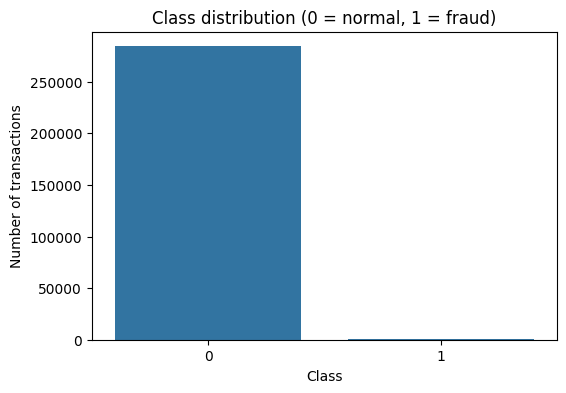

In [ ]:
# Here I make a bar plot of the class distribution
plt.figure(figsize=(6,4))  # Here I set the size of the figure
# Here I create a bar plot for the counts of each class
sns.barplot(x=class_counts.index, y=class_counts.values)
# Here I set a title for the plot
plt.title("Class distribution (0 = normal, 1 = fraud)")
# Here I set the label for the x axis
plt.xlabel("Class")
# Here I set the label for the y axis
plt.ylabel("Number of transactions")
# Here I show the plot
plt.show()


### Step 2.3 – Visualization of class distribution

Here we visualize the distribution of the target variable using a bar plot in order to make the class imbalance more explicit. Plotting the number of transactions per class provides an immediate and intuitive understanding of how dominant the normal transactions are compared to fraudulent ones.

The resulting figure clearly highlights the extreme imbalance in the dataset: the bar corresponding to class 0 largely dominates the plot, while the fraud class (1) is barely visible. This visualization reinforces the numerical results obtained earlier and confirms that standard accuracy-based evaluation would be misleading. As a result, this imbalance must be carefully addressed in the modeling stage, both in terms of algorithm selection and performance metrics.


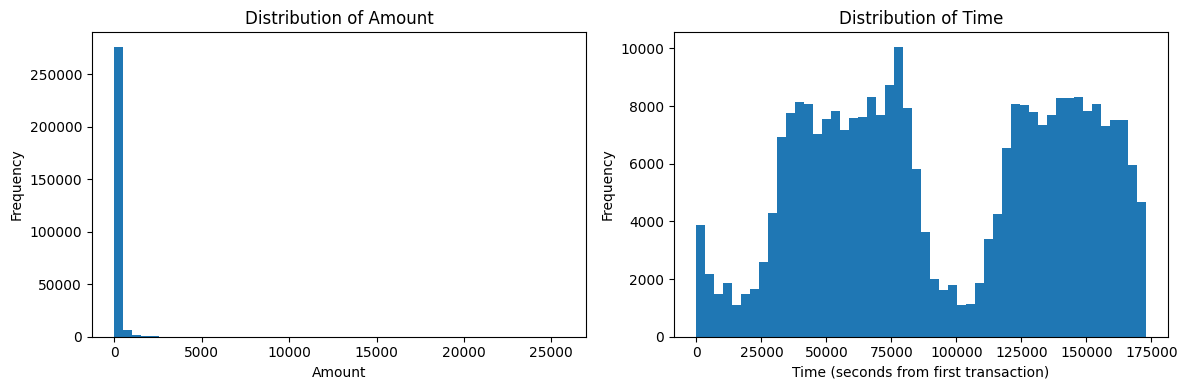

In [ ]:

# 2.4 Distribution of 'Amount' and 'Time'


# Here I create a figure with two subplots to show histograms
plt.figure(figsize=(12,4))  # Here I set the global figure size

# Here I create the first subplot for the 'Amount' feature
plt.subplot(1,2,1)
# Here I plot the histogram of the transaction amounts
plt.hist(df["Amount"], bins=50)
# Here I set the title of the histogram
plt.title("Distribution of Amount")
# Here I label the x axis
plt.xlabel("Amount")
# Here I label the y axis
plt.ylabel("Frequency")

# Here I create the second subplot for the 'Time' feature
plt.subplot(1,2,2)
# Here I plot the histogram of the transaction times
plt.hist(df["Time"], bins=50)
# Here I set the title of the histogram
plt.title("Distribution of Time")
# Here I label the x axis
plt.xlabel("Time (seconds from first transaction)")
# Here I label the y axis
plt.ylabel("Frequency")

# Here I adjust the layout so that plots do not overlap
plt.tight_layout()
# Here I show the plots
plt.show()


### Step 2.4 – Distribution of Amount and Time

Here we analyze the distributions of the Amount and Time features using histograms to better understand their underlying structure. Visualizing these variables helps us identify skewness, concentration of values, and potential outliers that may influence the learning process.

From the plots, we observe that the Amount variable is highly right-skewed: most transactions correspond to small amounts, while a few very large transactions create a long tail. This suggests that scaling or transformation may be necessary before modeling. The Time distribution, on the other hand, appears more structured and reflects the temporal ordering of transactions over the full recording period, with visible variations in activity levels. This indicates that time-related patterns may exist and could potentially be exploited by certain models.


In [ ]:

# Step 3 - Preprocessing


# In this dataset most features V1..V28 are already scaled (PCA components),
# but 'Time' and 'Amount' are not scaled.
# We will:
#   - separate features and target
#   - scale 'Time' and 'Amount'
#   - keep other features as they are
#   - split dataset into train and test sets


# 3.1 Separate features and target


# Here I define the name of the target column
target_column = "Class"

# Here I create X with all columns except the target
X = df.drop(columns=[target_column])

# Here I create y with only the target column
y = df[target_column]


In [ ]:

# 3.2 Train-test split


# Here I split the data into training and test sets
# test_size=0.2 means 20% of data for test
# random_state is fixed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Here I use stratify to keep same class distribution in train and test
)

# Here I print the shapes of the splits to check the dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)


In [ ]:

# 3.3 standardize Scale 'Time' and 'Amount'


# Here I create a copy of X_train to avoid modifying original data
X_train_processed = X_train.copy()
# Here I create a copy of X_test for the same reason
X_test_processed = X_test.copy()

# Here I define the columns that I want to scale
columns_to_scale = ["Time", "Amount"]

# Here I create a StandardScaler object
scaler = StandardScaler()

# Here I fit the scaler only on training data to avoid data leakage
scaler.fit(X_train_processed[columns_to_scale])

# Here I transform the training data for the selected columns
X_train_processed[columns_to_scale] = scaler.transform(X_train_processed[columns_to_scale])

# Here I transform the test data with the same scaler (no fit here)
X_test_processed[columns_to_scale] = scaler.transform(X_test_processed[columns_to_scale])

# Here I show the first rows of the processed training data to check the result
X_train_processed.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
265518,1.411588,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.322494
180305,0.623141,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.339764
42664,-1.130680,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346693
198723,0.794699,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.327360
82325,-0.748102,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008281


### Step 3 – Preprocessing and data preparation

Here we prepare the dataset for modeling by separating the features from the target variable and applying the necessary preprocessing steps. We first isolate the target column Class from the input features, then split the data into training and test sets using a stratified split. The use of stratify=y ensures that the strong class imbalance observed earlier is preserved in both subsets, which is essential for a fair evaluation of the models.

Since most variables (V1 to V28) are already scaled due to prior PCA transformation, we only standardize the Time and Amount features. We fit the StandardScaler exclusively on the training data to avoid data leakage, and then apply the same transformation to the test set. The resulting preview of X_train_processed confirms that Time and AmounT are now centered and scaled consistently with the rest of the features, making the dataset ready for machine learning algorithms.


In [ ]:

# Step 4 - Problem formalisation



# - Input (X): transaction features (Time, Amount, V1..V28)
# - Output (y): binary variable "Class" (0 = normal, 1 = fraud)
# - Task type: supervised binary classification
# - Goal: predict if a new transaction is fraudulent or not
# - Performance metrics: we care about recall for fraud class,
#   precision, F1-score, and ROC-AUC because the classes are very imbalanced.



In [ ]:

# Step 5 - Baseline model: Logistic Regression



# For a baseline model, I choose Logistic Regression because:
# - It is a simple linear model
# - It is fast to train
# - It gives probabilities for the positive class
# - It is a common baseline for binary classification

# 5.1 Create and train the model


# Here I create the Logistic Regression model
# I use class_weight='balanced' to give more weight to the minority class (fraud)
baseline_model = LogisticRegression(
    class_weight='balanced',  # Here I balance classes because dataset is highly imbalanced
    max_iter=1000,            # Here I increase max_iter to be sure the model converges
    n_jobs=-1                 # Here I use all CPU cores if possible
)

# Here I fit the model on the processed training data
baseline_model.fit(X_train_processed, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [ ]:

# 5.2 Evaluate the model


# Here I use the model to predict labels for the test set
y_pred = baseline_model.predict(X_test_processed)

# Here I also get the predicted probabilities for the positive class (fraud = 1)
y_proba = baseline_model.predict_proba(X_test_processed)[:, 1]

# Here I print a text classification report with precision, recall, F1-score
print("Classification report (baseline logistic regression):")
print(classification_report(y_test, y_pred, digits=4))


Classification report (baseline logistic regression):
              precision    recall  f1-score   support

           0     0.9999    0.9756    0.9876     56864
           1     0.0610    0.9184    0.1144        98

    accuracy                         0.9755     56962
   macro avg     0.5304    0.9470    0.5510     56962
weighted avg     0.9982    0.9755    0.9861     56962



### Step 4 & 5 – Problem formalisation and baseline Logistic Regression

Here we formally define the machine learning problem as a supervised binary classification task, where the goal is to predict whether a transaction is fraudulent or not based on its features. Given the extreme class imbalance observed earlier, we explicitly state that recall for the fraud class, along with precision, F1-score, and ROC-AUC, are more relevant metrics than raw accuracy. This framing directly guides our modeling and evaluation choices.

As a baseline, we train a Logistic Regression model with class_weight='balanced' to compensate for the under-representation of fraud cases. The classification report shows that the model achieves very high overall accuracy, which is expected in such an imbalanced setting. However, a closer look reveals the real trade-off: while recall for the fraud class is high (the model detects most fraudulent transactions), precision remains very low, meaning many normal transactions are incorrectly flagged as fraud. This baseline therefore provides a useful reference point and highlights the core challenge of the problem: improving fraud detection while reducing false positives.


Confusion matrix:
[[55478  1386]
 [    8    90]]


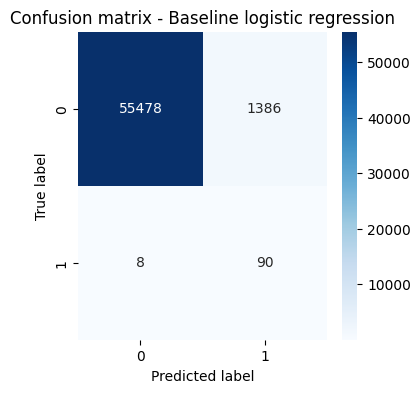

In [ ]:
# Here I compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Here I print the confusion matrix values
print("Confusion matrix:")
print(cm)

# Here I plot the confusion matrix as a heatmap for better visualization
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Baseline logistic regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


### Confusion matrix – Baseline Logistic Regression

Here we analyze the confusion matrix to better understand how the baseline logistic regression model behaves in practice. Unlike global metrics, the confusion matrix allows us to explicitly observe the number of correct and incorrect predictions for each class, which is particularly important in a highly imbalanced fraud detection context.

From the results, we see that the model correctly classifies most normal transactions, but also produces a significant number of false positives, where legitimate transactions are predicted as fraud. At the same time, the number of false negatives remains very low, meaning that only a few fraudulent transactions are missed. This confirms the behavior observed in the classification report: the model prioritizes recall for the fraud class at the cost of precision. While this may be acceptable in certain risk-sensitive scenarios, it clearly indicates the need for more refined models or decision strategies to reduce unnecessary alerts.


In [ ]:
# Here I calculate the ROC-AUC score, which is good for imbalanced datasets
roc_auc = roc_auc_score(y_test, y_proba)

# Here I print the ROC-AUC score
print(f"ROC-AUC score: {roc_auc:.4f}")

#probabilité que le modèle donne une probabilité plus élevée à une fraude qu’à une transaction normale choisie au hasard.


In [ ]:
# Here I plot the ROC curve to visualize the trade-off between TPR and FPR
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC curve - Baseline logistic regression")
plt.show()


In [ ]:

# PART II - Project
# Grid Search + Ensemble Learning on creditcard fraud dataset


# Here I import the extra libraries needed for Part II
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    f1_score
)




In [ ]:

# Step 1 - Grid Search on baseline Logistic Regression


# Here I define the parameter grid for Logistic Regression
# I choose some values for C (regularization strength)
# and I test with and without class_weight='balanced'
param_grid_logreg = {
    "C": [0.01, 0.1, 1.0, 10.0],           # Here I test different levels of regularization
    "class_weight": [None, "balanced"],    # Here I test if balancing classes helps
    "solver": ["lbfgs"],                   # Here I fix solver to lbfgs (good default)
    "penalty": ["l2"]                      # Here I use L2 penalty (standard choice)
}

# Here I create a new Logistic Regression model (baseline family)
logreg_base = LogisticRegression(
    max_iter=1000,      # Here I increase max_iter to make sure optimization converges
    n_jobs=-1           # Here I use all CPU cores available
)

# Here I define the scoring metric for grid search
# Because the dataset is imbalanced, I prefer ROC-AUC instead of accuracy
scoring_metric = "roc_auc"

# Here I create the GridSearchCV object for Logistic Regression
grid_logreg = GridSearchCV(
    estimator=logreg_base,        # Here I use the baseline Logistic Regression as estimator
    param_grid=param_grid_logreg, # Here I pass the parameter grid defined above
    scoring=scoring_metric,       # Here I use ROC-AUC as evaluation metric
    cv=3,                         # Here I use 3-fold cross-validation
    n_jobs=-1,                    # Here I use all CPU cores to speed up computation
    verbose=2                     # Here I increase verbosity to see progress in the console
)

# Here I fit the grid search on the training data
grid_logreg.fit(X_train_processed, y_train)

# Here I print the best hyperparameters found by grid search
print("Best parameters for Logistic Regression:")
print(grid_logreg.best_params_)

# Here I print the best cross-validation score obtained
print(f"Best CV ROC-AUC for Logistic Regression: {grid_logreg.best_score_:.4f}")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Logistic Regression:
{'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV ROC-AUC for Logistic Regression: 0.9831


In [ ]:
# Here I extract the best Logistic Regression model from the grid search
best_logreg = grid_logreg.best_estimator_

# Here I use the best model to predict labels on the test set
y_pred_logreg = best_logreg.predict(X_test_processed)

# Here I get predicted probabilities for the positive class (fraud = 1)
y_proba_logreg = best_logreg.predict_proba(X_test_processed)[:, 1]

# Here I print the classification report for the tuned Logistic Regression
print("Classification report - Tuned Logistic Regression:")
print(classification_report(y_test, y_pred_logreg, digits=4))

# Here I compute the confusion matrix for the tuned Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Here I print the confusion matrix values
print("Confusion matrix - Tuned Logistic Regression:")
print(cm_logreg)

# Here I compute ROC-AUC on the test set
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)
print(f"Test ROC-AUC - Tuned Logistic Regression: {roc_auc_logreg:.4f}")


Classification report - Tuned Logistic Regression:
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56864
           1     0.8219    0.6122    0.7018        98

    accuracy                         0.9991     56962
   macro avg     0.9106    0.8060    0.8507     56962
weighted avg     0.9990    0.9991    0.9990     56962

Confusion matrix - Tuned Logistic Regression:
[[56851    13]
 [   38    60]]
Test ROC-AUC - Tuned Logistic Regression: 0.9721


### Grid Search and tuned Logistic Regression – Results analysis

Here we can observe that the grid search significantly changes the behavior of the Logistic Regression model compared to the baseline. By optimizing the hyperparameters using ROC-AUC as the scoring metric, the model becomes much more conservative in predicting fraud. This is reflected in the confusion matrix, where the number of false positives is drastically reduced compared to the baseline model.

However, this improvement comes with a clear trade-off. While precision for the fraud class increases substantially, recall drops to around 61%, meaning that a non-negligible number of fraudulent transactions are now missed. In other words, the model is better at being confident when it predicts fraud, but it fails to detect a significant portion of actual fraud cases. The ROC-AUC score remains high, indicating good ranking ability, but the class-level metrics reveal that the model may not be suitable if the primary objective is to minimize missed frauds. Overall, this result highlights the limitations of Logistic Regression for this task and motivates the exploration of more expressive models or ensemble methods.


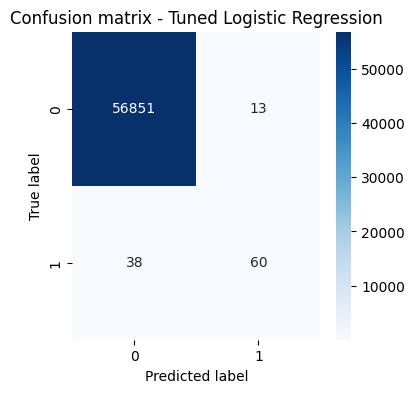

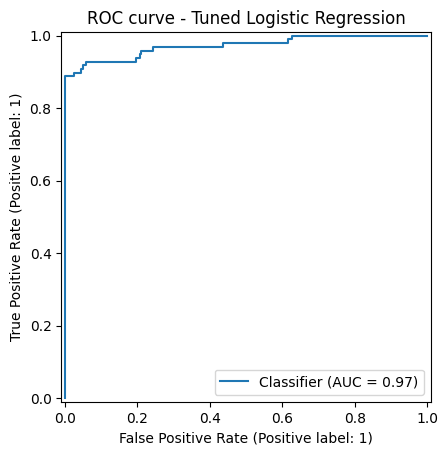

In [ ]:
# Here I plot the confusion matrix for the tuned Logistic Regression
plt.figure(figsize=(4,4))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion matrix - Tuned Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Here I plot the ROC curve for the tuned Logistic Regression
RocCurveDisplay.from_predictions(y_test, y_proba_logreg)
plt.title("ROC curve - Tuned Logistic Regression")
plt.show()


### Tuned Logistic Regression – Confusion matrix and ROC curve analysis

Here we can observe from the confusion matrix that the tuned Logistic Regression model makes far fewer false positive predictions compared to the baseline. Only a very small number of normal transactions are incorrectly classified as fraud, which confirms the strong increase in precision observed earlier. However, this stricter decision boundary also leads to a relatively high number of false negatives, meaning that several fraudulent transactions are not detected. This behavior clearly shows that the tuning process favors precision over recall for the fraud class.

The ROC curve confirms that the model has a strong overall discriminative ability, with an AUC close to 0.97. This indicates that the model is effective at ranking transactions by risk across different decision thresholds. Nevertheless, the confusion matrix highlights an important limitation: despite a high ROC-AUC, the default classification threshold does not align well with the primary objective of fraud detection. This result suggests that further improvements may require threshold adjustment, cost-sensitive decision rules, or the use of more expressive models such as ensemble methods.


In [ ]:

# Step 2 - Grid Search on Decision Tree


# Here I define a lighter parameter grid for the Decision Tree
# I reduce the number of tested values to make the grid search faster
param_grid_tree = {
    # Here I fix criterion to "gini" to simplify the search
    "max_depth": [4, 6, 8],           # Here I test only 3 reasonable depths
    "min_samples_split": [2, 5],      # Here I test 2 values for min_samples_split
    "min_samples_leaf": [1, 2],       # Here I test 2 values for min_samples_leaf
    "class_weight": ["balanced"]      # Here I force class_weight to "balanced"
}

# Here I create a base Decision Tree model with gini criterion
tree_base = DecisionTreeClassifier(
    criterion="gini",        # Here I use gini as a standard choice
    random_state=42          # Here I fix random_state for reproducibility
)

# Here I create the GridSearchCV object for the Decision Tree
grid_tree = GridSearchCV(
    estimator=tree_base,         # Here I use the base Decision Tree as estimator
    param_grid=param_grid_tree,  # Here I pass the lighter parameter grid
    scoring=scoring_metric,      # Here I keep ROC-AUC as metric
    cv=3,                        # Here I use 3-fold cross-validation
    n_jobs=-1,                   # Here I use all CPU cores
    verbose=2                    # Here I display progress in the console
)

# Here I fit the grid search for the Decision Tree on the training data
grid_tree.fit(X_train_processed, y_train)

# Here I print the best hyperparameters for the Decision Tree
print("Best parameters for Decision Tree (light grid):")
print(grid_tree.best_params_)

# Here I print the best CV ROC-AUC for the Decision Tree
print(f"Best CV ROC-AUC for Decision Tree (light grid): {grid_tree.best_score_:.4f}")



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Decision Tree (light grid):
{'class_weight': 'balanced', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV ROC-AUC for Decision Tree (light grid): 0.9239


In [ ]:
# Here I extract the best Decision Tree model from grid search
best_tree = grid_tree.best_estimator_

# Here I use the best tree model to predict labels on the test set
y_pred_tree = best_tree.predict(X_test_processed)

# Here I get predicted probabilities for the positive class (fraud = 1)
y_proba_tree = best_tree.predict_proba(X_test_processed)[:, 1]

# Here I print the classification report for the tuned Decision Tree
print("Classification report - Tuned Decision Tree:")
print(classification_report(y_test, y_pred_tree, digits=4))

# Here I compute the confusion matrix for the tuned Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Here I print the confusion matrix
print("Confusion matrix - Tuned Decision Tree:")
print(cm_tree)

# Here I compute ROC-AUC for the tuned Decision Tree
roc_auc_tree = roc_auc_score(y_test, y_proba_tree)
print(f"Test ROC-AUC - Tuned Decision Tree: {roc_auc_tree:.4f}")


Classification report - Tuned Decision Tree:
              precision    recall  f1-score   support

           0     0.9998    0.9519    0.9752     56864
           1     0.0305    0.8776    0.0589        98

    accuracy                         0.9517     56962
   macro avg     0.5151    0.9147    0.5170     56962
weighted avg     0.9981    0.9517    0.9736     56962

Confusion matrix - Tuned Decision Tree:
[[54126  2738]
 [   12    86]]
Test ROC-AUC - Tuned Decision Tree: 0.9280


### Tuned Decision Tree – Results analysis

Here we can observe that the tuned Decision Tree exhibits a very different behavior compared to the Logistic Regression models. The recall for the fraud class is relatively high, meaning that the model successfully detects most fraudulent transactions. This confirms that tree-based models are able to capture non-linear patterns in the data that simpler linear models may miss.

However, this improvement in recall comes at a significant cost in terms of precision. The very low precision for the fraud class indicates that a large number of normal transactions are incorrectly classified as fraud, which is also clearly visible in the confusion matrix through the high number of false positives. Despite a reasonably good ROC-AUC score, these results suggest that the Decision Tree alone is not a reliable model for this problem, as it tends to overreact to minority class patterns. This highlights the instability of single trees on highly imbalanced datasets and motivates the use of ensemble methods to stabilize predictions.


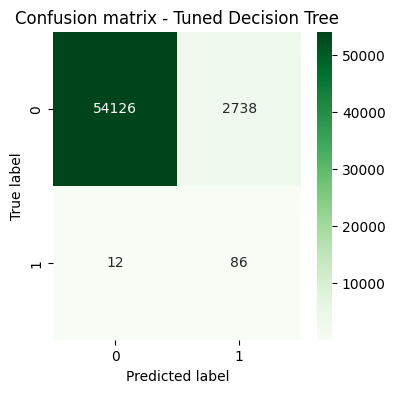

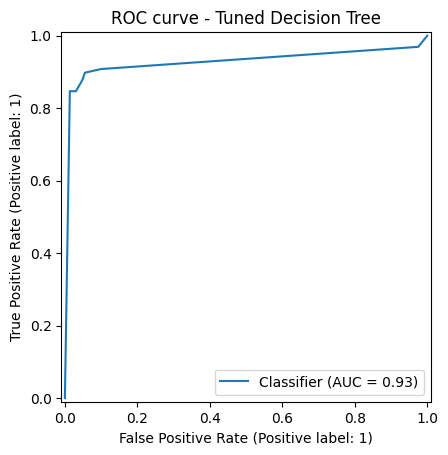

In [ ]:
# Here I plot the confusion matrix for the tuned Decision Tree
plt.figure(figsize=(4,4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion matrix - Tuned Decision Tree")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Here I plot the ROC curve for the tuned Decision Tree
RocCurveDisplay.from_predictions(y_test, y_proba_tree)
plt.title("ROC curve - Tuned Decision Tree")
plt.show()


### Tuned Decision Tree – Confusion matrix and ROC curve analysis

Here we can observe from the confusion matrix that the tuned Decision Tree detects most fraudulent transactions, as indicated by the relatively low number of false negatives. This confirms the high recall obtained for the fraud class and shows that the model is effective at identifying suspicious transactions.

However, the matrix also reveals a very large number of false positives, where normal transactions are incorrectly classified as fraud. This behavior severely limits the practical usability of the model, as it would generate an excessive number of alerts. The ROC curve shows a reasonably good AUC, which means the model has some discriminative power across thresholds, but the confusion matrix makes it clear that the default operating point is poorly balanced. Overall, this result illustrates that while Decision Trees can capture complex patterns, they tend to be unstable on highly imbalanced data when used alone, reinforcing the need for ensemble-based approaches.


In [ ]:

# Step 3 - Compare tuned baseline models


# Here I create a dictionary to store evaluation metrics for each model
results_baseline = {}

# Here I compute F1-score for fraud class (1) for Logistic Regression
f1_logreg = f1_score(y_test, y_pred_logreg, pos_label=1)
# Here I store metrics for Logistic Regression in the results dictionary
results_baseline["Logistic Regression"] = {
    "ROC_AUC": roc_auc_logreg,
    "F1_fraud": f1_logreg
}

# Here I compute F1-score for fraud class (1) for Decision Tree
f1_tree = f1_score(y_test, y_pred_tree, pos_label=1)
# Here I store metrics for Decision Tree in the results dictionary
results_baseline["Decision Tree"] = {
    "ROC_AUC": roc_auc_tree,
    "F1_fraud": f1_tree
}

# Here I convert the dictionary to a pandas DataFrame for better display
baseline_df = pd.DataFrame(results_baseline).T

# Here I print the results table
print("Comparison of tuned baseline models:")
print(baseline_df)


Comparison of tuned baseline models:
                      ROC_AUC  F1_fraud
Logistic Regression  0.972146  0.701754
Decision Tree        0.928037  0.058864


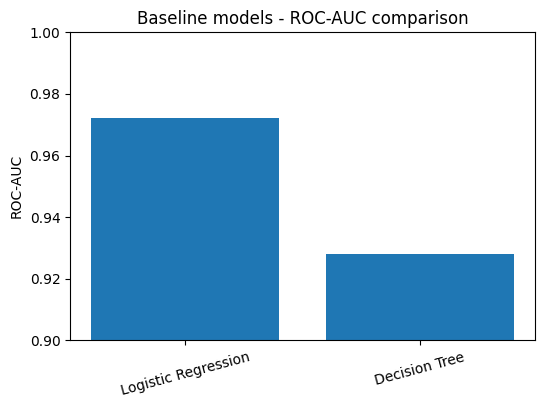

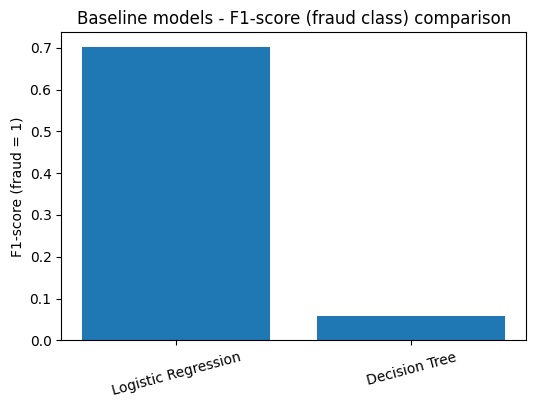

In [ ]:
# Here I create a bar plot to compare ROC-AUC of the baseline models
plt.figure(figsize=(6,4))
# Here I use the index of the dataframe as x-axis labels
plt.bar(baseline_df.index, baseline_df["ROC_AUC"])
plt.title("Baseline models - ROC-AUC comparison")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=15)
plt.ylim(0.9, 1.0)  # Here I set a reasonable y-limits (you can adapt)
plt.show()

# Here I create a second bar plot to compare F1-score on fraud class
plt.figure(figsize=(6,4))
plt.bar(baseline_df.index, baseline_df["F1_fraud"])
plt.title("Baseline models - F1-score (fraud class) comparison")
plt.ylabel("F1-score (fraud = 1)")
plt.xticks(rotation=15)
plt.show()


### Comparison of tuned baseline models

Here we directly compare the tuned Logistic Regression and the tuned Decision Tree using two key metrics that are relevant for this problem: ROC-AUC and F1-score on the fraud class. This comparison allows us to move beyond individual model analysis and objectively assess which approach provides a better trade-off between detection capability and prediction reliability.

From the results and the visualizations, we can observe that Logistic Regression clearly outperforms the Decision Tree on both metrics. The higher ROC-AUC indicates a better overall ability to separate fraudulent and non-fraudulent transactions, while the much higher F1-score for the fraud class shows a more balanced compromise between precision and recall. In contrast, despite a reasonable ROC-AUC, the Decision Tree suffers from an extremely low F1-score, mainly due to an excessive number of false positives. Based on these observations, Logistic Regression appears to be a more robust baseline model for this dataset, while the Decision Tree confirms the need for ensemble methods to stabilize and improve performance.


In [ ]:

# Step 4 - Ensemble model: Bagging with Decision Tree


# Here I create a BaggingClassifier using the best Decision Tree as base estimator
bagging_tree = BaggingClassifier(
    estimator=best_tree,    # Here I reuse the tuned Decision Tree from grid search
    n_estimators=10,        # Here I set the number of trees in the ensemble
    max_samples=0.8,        # Here I use 80% of samples for each base estimator
    bootstrap=True,         # Here I use sampling with replacement
    n_jobs=-1,              # Here I use all CPU cores
    random_state=42         # Here I fix random_state for reproducibility
)

# Here I fit the Bagging model on the training data
bagging_tree.fit(X_train_processed, y_train)

# Here I predict labels on the test data using the Bagging model
y_pred_bagging = bagging_tree.predict(X_test_processed)

# Here I get predicted probabilities for the positive class (fraud = 1)
y_proba_bagging = bagging_tree.predict_proba(X_test_processed)[:, 1]

# Here I print the classification report for the Bagging Decision Tree
print("Classification report - Bagging (Decision Tree):")
print(classification_report(y_test, y_pred_bagging, digits=4))

# Here I compute the confusion matrix for the Bagging model
cm_bagging = confusion_matrix(y_test, y_pred_bagging)

# Here I print the confusion matrix
print("Confusion matrix - Bagging (Decision Tree):")
print(cm_bagging)

# Here I compute ROC-AUC for the Bagging model
roc_auc_bagging = roc_auc_score(y_test, y_proba_bagging)
print(f"Test ROC-AUC - Bagging (Decision Tree): {roc_auc_bagging:.4f}")


Classification report - Bagging (Decision Tree):
              precision    recall  f1-score   support

           0     0.9997    0.9889    0.9943     56864
           1     0.1161    0.8469    0.2042        98

    accuracy                         0.9886     56962
   macro avg     0.5579    0.9179    0.5992     56962
weighted avg     0.9982    0.9886    0.9929     56962

Confusion matrix - Bagging (Decision Tree):
[[56232   632]
 [   15    83]]
Test ROC-AUC - Bagging (Decision Tree): 0.9711


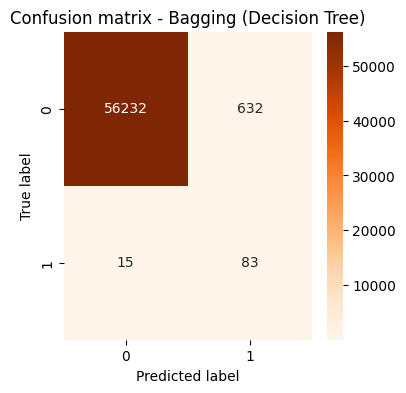

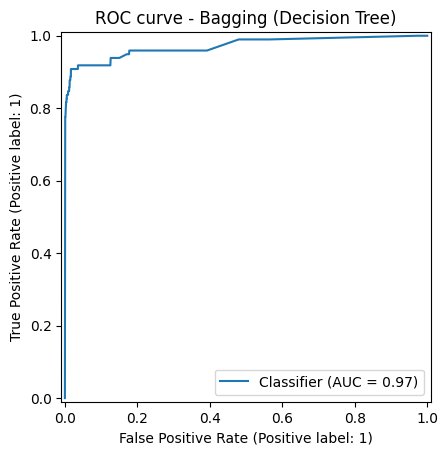

In [ ]:
# Here I plot the confusion matrix for the Bagging model
plt.figure(figsize=(4,4))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion matrix - Bagging (Decision Tree)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Here I plot the ROC curve for the Bagging model
RocCurveDisplay.from_predictions(y_test, y_proba_bagging)
plt.title("ROC curve - Bagging (Decision Tree)")
plt.show()


### Bagging with Decision Trees – Results analysis

Here we can observe that applying bagging to the Decision Tree significantly stabilizes the model compared to the single-tree approach. The confusion matrix shows a clear reduction in false positives while still maintaining a strong ability to detect fraudulent transactions. This confirms that aggregating multiple trees helps smooth out the instability observed earlier with the standalone Decision Tree.

The ROC curve further supports this observation, with a ROC-AUC comparable to the tuned Logistic Regression, indicating strong overall discriminative power. Although the model still produces some false alarms, the balance between precision and recall for the fraud class is noticeably improved. Overall, these results show that ensemble methods such as bagging are effective at mitigating the weaknesses of individual trees and represent a meaningful step forward for this fraud detection task.


In [ ]:

# Step 5 - Ensemble model: VotingClassifier (soft voting)


# Here I create a soft voting ensemble that combines:
# - the best Logistic Regression
# - the best Decision Tree
voting_clf = VotingClassifier(
    estimators=[
        ("logreg", best_logreg),  # Here I add the tuned Logistic Regression
        ("tree", best_tree)       # Here I add the tuned Decision Tree
    ],
    voting="soft",                # Here I use soft voting (average of probabilities)
    n_jobs=-1                     # Here I use all CPU cores if possible
)

# Here I fit the VotingClassifier on the training data
voting_clf.fit(X_train_processed, y_train)

# Here I predict labels on the test set using the VotingClassifier
y_pred_voting = voting_clf.predict(X_test_processed)

# Here I get predicted probabilities for the positive class (fraud = 1)
# For soft voting, predict_proba is available
y_proba_voting = voting_clf.predict_proba(X_test_processed)[:, 1]

# Here I print the classification report for the Voting ensemble
print("Classification report - Voting (LogReg + Tree):")
print(classification_report(y_test, y_pred_voting, digits=4))

# Here I compute the confusion matrix for the Voting ensemble
cm_voting = confusion_matrix(y_test, y_pred_voting)

# Here I print the confusion matrix
print("Confusion matrix - Voting (LogReg + Tree):")
print(cm_voting)

# Here I compute ROC-AUC for the Voting ensemble
roc_auc_voting = roc_auc_score(y_test, y_proba_voting)
print(f"Test ROC-AUC - Voting (LogReg + Tree): {roc_auc_voting:.4f}")


Classification report - Voting (LogReg + Tree):
              precision    recall  f1-score   support

           0     0.9997    0.9989    0.9993     56864
           1     0.5724    0.8469    0.6831        98

    accuracy                         0.9986     56962
   macro avg     0.7861    0.9229    0.8412     56962
weighted avg     0.9990    0.9986    0.9988     56962

Confusion matrix - Voting (LogReg + Tree):
[[56802    62]
 [   15    83]]
Test ROC-AUC - Voting (LogReg + Tree): 0.9714


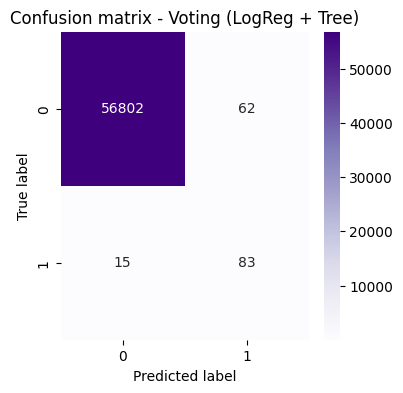

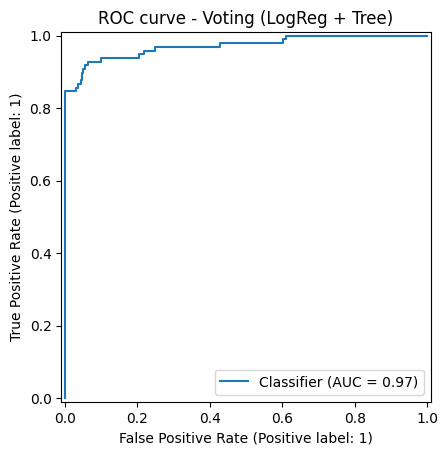

In [ ]:
# Here I plot the confusion matrix for the Voting ensemble
plt.figure(figsize=(4,4))
sns.heatmap(cm_voting, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion matrix - Voting (LogReg + Tree)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Here I plot the ROC curve for the Voting ensemble
RocCurveDisplay.from_predictions(y_test, y_proba_voting)
plt.title("ROC curve - Voting (LogReg + Tree)")
plt.show()


### Voting ensemble (Logistic Regression + Decision Tree) – Results analysis

Here we can observe that the soft voting ensemble combines some of the strengths of both base models. The confusion matrix shows a very small number of false positives while still detecting a large proportion of fraudulent transactions. Compared to the single Decision Tree, the ensemble is clearly more stable, and compared to Logistic Regression alone, it slightly improves the balance between precision and recall for the fraud class.

The ROC curve confirms that the voting model maintains a strong overall discriminative power, with an AUC comparable to the best individual models. However, we can also observe that the improvement over bagging or tuned Logistic Regression remains moderate. This suggests that while soft voting helps smooth individual model weaknesses, the ensemble is still constrained by the limitations of its base learners. Overall, this model represents a solid compromise, but further gains would likely require more diverse or more powerful classifiers.


In [ ]:

# Step 6 - Global comparison of all models


# Here I create a dictionary to store metrics for all models
results_all = {}

# Here I store metrics for the tuned Logistic Regression
results_all["Logistic Regression (GS)"] = {
    "ROC_AUC": roc_auc_logreg,
    "F1_fraud": f1_score(y_test, y_pred_logreg, pos_label=1)
}

# Here I store metrics for the tuned Decision Tree
results_all["Decision Tree (GS)"] = {
    "ROC_AUC": roc_auc_tree,
    "F1_fraud": f1_score(y_test, y_pred_tree, pos_label=1)
}

# Here I store metrics for the Bagging model
results_all["Bagging (Tree)"] = {
    "ROC_AUC": roc_auc_bagging,
    "F1_fraud": f1_score(y_test, y_pred_bagging, pos_label=1)
}

# Here I store metrics for the Voting ensemble
results_all["Voting (LogReg + Tree)"] = {
    "ROC_AUC": roc_auc_voting,
    "F1_fraud": f1_score(y_test, y_pred_voting, pos_label=1)
}

# Here I convert the dictionary to a DataFrame
results_all_df = pd.DataFrame(results_all).T

# Here I print the global comparison table
print("Global comparison of all models:")
print(results_all_df)


Global comparison of all models:
                           ROC_AUC  F1_fraud
Logistic Regression (GS)  0.972146  0.701754
Decision Tree (GS)        0.928037  0.058864
Bagging (Tree)            0.971123  0.204182
Voting (LogReg + Tree)    0.971359  0.683128


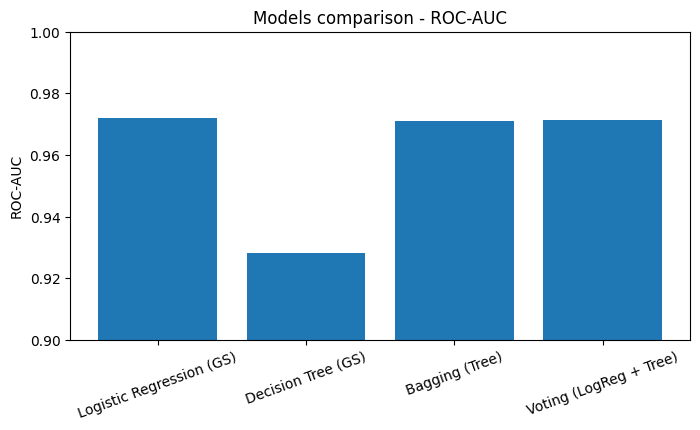

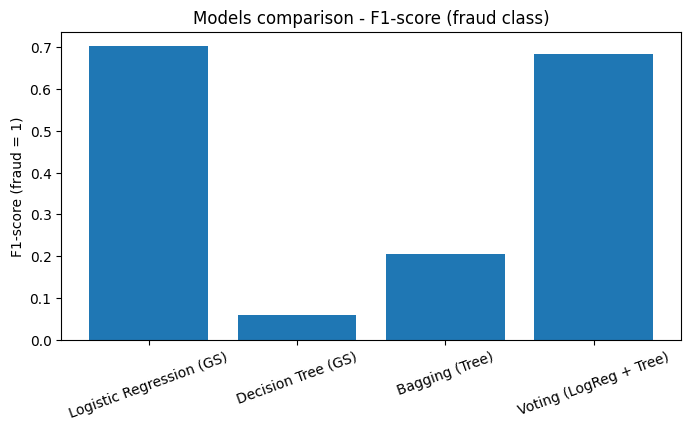

In [ ]:
# Here I create a bar plot to compare ROC-AUC for all models
plt.figure(figsize=(8,4))
plt.bar(results_all_df.index, results_all_df["ROC_AUC"])
plt.title("Models comparison - ROC-AUC")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=20)
plt.ylim(0.9, 1.0)  # You can adapt limits depending on your scores
plt.show()

# Here I create another bar plot for F1-score on fraud class (1)
plt.figure(figsize=(8,4))
plt.bar(results_all_df.index, results_all_df["F1_fraud"])
plt.title("Models comparison - F1-score (fraud class)")
plt.ylabel("F1-score (fraud = 1)")
plt.xticks(rotation=20)
plt.show()


### Global comparison of all models

Here we compare all trained models using two complementary metrics: ROC-AUC, which measures the overall ranking ability of the classifiers, and F1-score on the fraud class, which directly reflects the balance between precision and recall for the minority class. This global view allows us to objectively assess the strengths and weaknesses of each approach.

From the results, we can observe that Logistic Regression and the Voting ensemble achieve the best overall performance. Both models reach high ROC-AUC values, indicating strong discriminative power, but they also clearly outperform the tree-based approaches in terms of F1-score for the fraud class. The standalone Decision Tree performs poorly, confirming its instability on this highly imbalanced dataset, while bagging improves its performance but still does not match the linear and ensemble voting models. Overall, this comparison suggests that simpler, well-regularized models combined with lightweight ensembling provide the most reliable trade-off for this fraud detection task.


### Transition

Here we can conclude that, despite careful preprocessing, hyperparameter tuning, and the use of ensemble strategies, the obtained results remain unsatisfactory for a real-world fraud detection scenario. The models explored in this part of the project struggle to achieve a reliable balance between fraud detection and false alert reduction, mainly due to the extreme class imbalance and the complex, non-linear structure of the data. In particular, linear models and simple tree-based approaches show clear limitations, either missing a significant number of fraudulent transactions or generating too many false positives. For these reasons, the methods studied so far do not appear fully adapted to the nature of this dataset. Consequently, we now move on to more robust and specialized models, which are commonly used for fraud detection and will be explored in the next part of the notebook.


# Second Part

**Goal: Given transaction features, predict whether a transaction is fraudulent (Class = 1) or legitimate (Class = 0)**

In [ ]:
import kagglehub

# Here we use kagglehub to directly download the dataset from Kaggle
# This allows us to retrieve the data in a reproducible and automated way
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Here we print the local path where the dataset has been downloaded
# This helps us verify that the download was successful and locate the files
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import os

# Here we inspect the content of the directory where the dataset was downloaded
# This allows us to identify the available files and locate the actual data file
print(f"Contents of the dataset directory '{path}':")
print(os.listdir(path))


Contents of the dataset directory '/kaggle/input/creditcardfraud':
['creditcard.csv']


In [ ]:
import pandas as pd

# Here we load the main CSV file containing the credit card transactions
# We explicitly build the full path to the file to avoid any path-related issues
df = pd.read_csv(os.path.join(path, "creditcard.csv"))

# Here we display the first rows of the dataset
# This allows us to quickly verify that the data has been loaded correctly
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# inspect the structure and quality of a dataset

print("Shape (rows, cols):", df.shape)
print("\nFirst 3 columns:", list(df.columns[:3]))
print("Total columns:", len(df.columns))

print("\nDtype counts:")
print(df.dtypes.value_counts())
mem_mb = df.memory_usage(deep=True).sum() / (1024**2)
print(f"\nEstimated memory usage: {mem_mb:.2f} MB")

dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")

Shape (rows, cols): (284807, 31)

First 3 columns: ['Time', 'V1', 'V2']
Total columns: 31

Dtype counts:
float64    30
int64       1
Name: count, dtype: int64

Estimated memory usage: 67.36 MB

Duplicate rows: 1081


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# null values

df.isnull().sum().sort_values(ascending=False)

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# missing values

import matplotlib.pyplot as plt
import seaborn as sns

na_counts = df.isna().sum()
na_pct = (na_counts / len(df) * 100).round(2)
na_df = (
    pd.DataFrame({"missing": na_counts, "%": na_pct})
    .sort_values(["missing", "%"], ascending=False)
)
print(na_df.head(20))

print(f"----------------------------------------")

# visualize
top = na_df[na_df["missing"] > 0].head()

if not top.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top.index, y=top["%"], color="salmon")

    plt.title("Top missing columns (% of rows)")
    plt.ylabel("% missing")
    plt.xlabel("Column")
    plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected.")

      missing    %
Time        0  0.0
V1          0  0.0
V2          0  0.0
V3          0  0.0
V4          0  0.0
V5          0  0.0
V6          0  0.0
V7          0  0.0
V8          0  0.0
V9          0  0.0
V10         0  0.0
V11         0  0.0
V12         0  0.0
V13         0  0.0
V14         0  0.0
V15         0  0.0
V16         0  0.0
V17         0  0.0
V18         0  0.0
V19         0  0.0
----------------------------------------
No missing values detected.


In [ ]:
# Class distribution
class_counts = df['Class'].value_counts().rename(index={0:'Legit(0)', 1:'Fraud(1)'})
class_ratio = df['Class'].mean()
print('Class distribution:')
display(class_counts.to_frame('count'))

class_pct = df["Class"].value_counts(normalize=True, dropna=False).sort_index() * 100
print("\nClass percentages (%):\n", class_pct.round(2))

minority_rate = class_pct.min()
majority_rate = class_pct.max()

print(f"\nMajority-class baseline accuracy: {majority_rate:.2f}%")
print(f'Fraud rate: {class_ratio:.5f} (~{class_ratio*100:.3f}%)')

Class distribution:


,count
Class,
Legit(0),284315
Fraud(1),492



Class percentages (%):
 Class
0    99.83
1     0.17
Name: proportion, dtype: float64

Majority-class baseline accuracy: 99.83%
Fraud rate: 0.00173 (~0.173%)


**Clearly indicates a significant class imbalance, with only about 0.173% of transactions being fraudulent**

In [ ]:

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title("Class distribution (0 = normal, 1 = fraud)")
plt.xlabel("Class")
plt.ylabel("Number of transactions")

plt.show()

In [ ]:
display(df[['Time','Amount']].describe(percentiles=[]))

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
50%,84692.000000,22.000000
max,172792.000000,25691.160000


**Amount Distribution:**

The Amount column shows a heavily right-skewed distribution. **The mean (88.35) is significantly higher than the median (22.00)**, and **the maximum value (25691.16) is much larger than both** -> indicates that most transactions are for small amounts, while a few transactions are for very large amounts.

**In fraud detection, these large or outlier amounts often warrant closer investigation as they can sometimes be indicators of fraudulent activity**

**Time (Relative Measurement):**

The Time column ranges from 0.0 to 172792.0. This strongly suggests that 'Time' represents the seconds elapsed since the very first transaction in the dataset, rather than an absolute timestamp.

**This relative time feature can be engineered into more useful features, such as 'hour of day' or 'day of week' (if the total time span allows for it), which might reveal patterns in fraudulent transactions.**

In [ ]:
# *************************to calculate skewness (symmetrical or asymetrical)*********************
# ************************kurtosis (heaviness of tails(peaks) compared to normal distribution)****
from scipy.stats import skew
from scipy.stats import kurtosis

skew_value = skew(df['Class'])
print(f"Skewness Coefficient: {skew_value:.3f}")        # .3f means till 3 decimal values

print()

kurtosis_value = kurtosis(df['Class'])
print(f"Kurtosis Coefficient: {kurtosis_value:.3f}")

Skewness Coefficient: 23.997

Kurtosis Coefficient: 573.878


**Skewness Coefficient: 23.997**

Skewness measures the asymmetry of the distribution.

A value of 0 means perfectly symmetrical.

A value of 23.997 is extremely positive, meaning:

The distribution is heavily right-skewed.

Most values are concentrated at Class = 0 (legit), with a tiny tail at Class = 1 (fraud).

This confirms severe class imbalance — fraud cases are extremely rare.

**Kurtosis Coefficient: 573.878**

Kurtosis measures the tailedness or peakedness of the distribution.

A normal distribution has kurtosis ≈ 3.

A value of 573.878 is extremely high, meaning:

The distribution has a very sharp peak at Class = 0.

The tails (fraud cases) are very thin and rare.

Indicates extreme concentration of data around the majority class.

In [ ]:
# Object and Category: unique values

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

if cat_cols:
    card = df[cat_cols].nunique(dropna=False).sort_values(ascending=False)
    print("Top 15 categorical columns by unique values:\n")
    print(card.head(15))
else:
    print("No categorical columns detected.")

No categorical columns detected.


In pandas, **object** is generally used for columns that contain strings or a mix of Python objects.

The **category** data type is a pandas-specific type for representing categorical data efficiently, which can save memory and speed up certain operations when you have a limited number of unique values.

All columns in this dataset are either float64 or int64 => means dataset contains only numerical data, which is why
correctly reported "No categorical columns detected."

**There are no 'object' or 'category' type columns in your df DataFrame.**

**EDA**

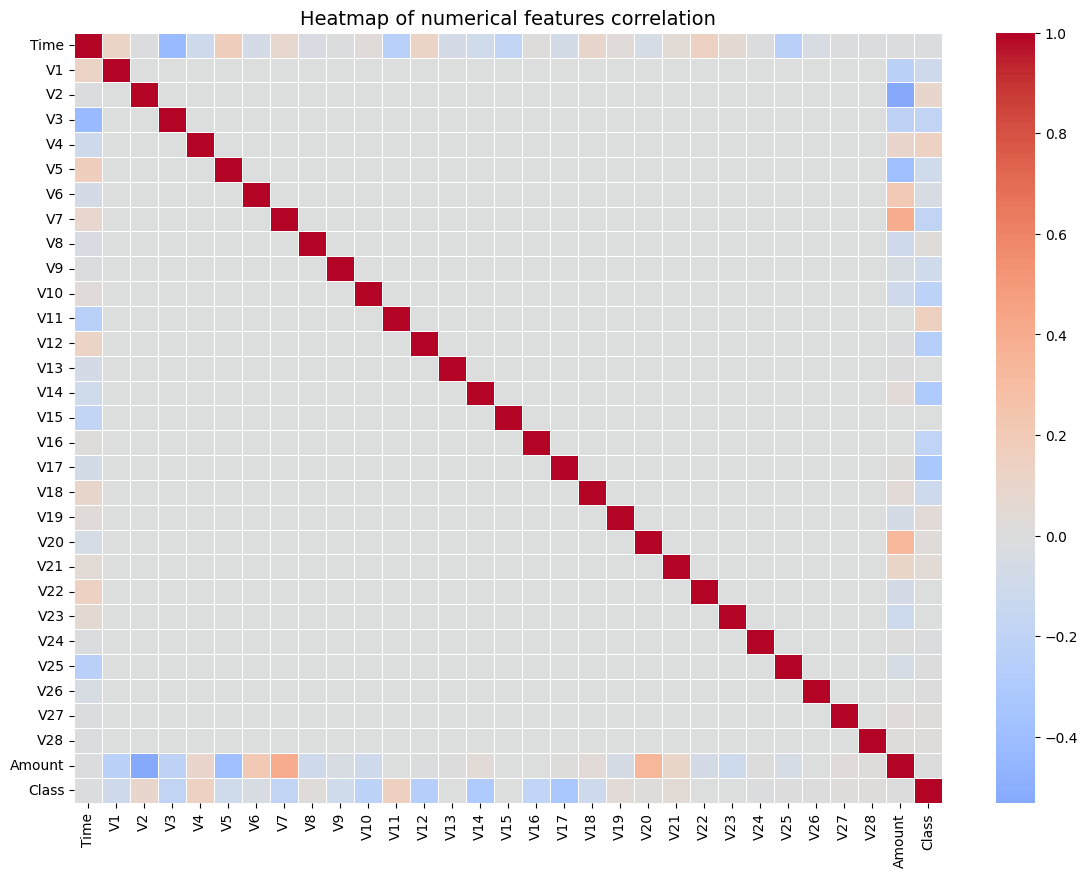

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


In [ ]:
# Correlation amongst features

corr_matrix = df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heatmap of numerical features correlation", fontsize=14)
plt.show()

# Strong correlation with Class{0,1}
df.corr()['Class'].sort_values(ascending=False)

### Correlation analysis of numerical features

Here we analyze the correlation heatmap to better understand the relationships between the numerical variables in the dataset. As expected, most of the features V1 to V28 show very low correlations with each other, which is consistent with the fact that they are PCA-transformed components. This indicates that multicollinearity is not a major issue for these variables.

We can also observe that the target variable Class has generally weak linear correlations with individual features, including Amount and Time. This suggests that fraudulent behavior is not driven by a single dominant variable but rather by complex combinations of features. As a result, models relying solely on linear relationships may struggle to fully capture the underlying patterns, which further motivates the use of more robust and non-linear approaches in the next steps of the project.


** Constraints:

PCA features (V1–V28): Already standardized by dataset authors → No need to rescale.

Amount & Time: Must be scaled (e.g., StandardScaler or MinMaxScaler) → prevents magnitude dominance in ML models**

Correlation with Class (Fraud Indicator)
Strongest correlations with Class (positive or negative):

V17, V14, V12, V10 → strong negative correlation (deep blue)

V4, V11, V7 → moderate positive correlation (light red)

These features are most predictive of fraud and should be prioritized in:

Feature selection

Model interpretation

SHAP or permutation importance analysis



Low correlation features (e.g., Time, Amount):

May still be useful in non-linear models (e.g., XGBoost, Random Forest)

Below: Tree-based models (Random Forest, XGBoost, LightGBM) split data by thresholds.
Because of this, they don’t care about feature magnitude or scaling — scaling won’t change the splits.

**So scaling Time and Amount is not required for Random Forest.**

But scaling them does no harm either, and it makes your dataset ready for other models (Logistic Regression, SVM, Neural Nets) that do require scaling.

,Time,hour_of_day,scaled_hour_of_day,Amount,scaled_amount,Class
0,0.0,0.000000,-2.486373,149.62,0.244964,0
1,0.0,0.000000,-2.486373,2.69,-0.342475,0
2,1.0,0.000278,-2.486326,378.66,1.160686,0
3,1.0,0.000278,-2.486326,123.50,0.140534,0
4,2.0,0.000556,-2.486278,69.99,-0.073403,0


------------------------Visualize---------------------------------------------


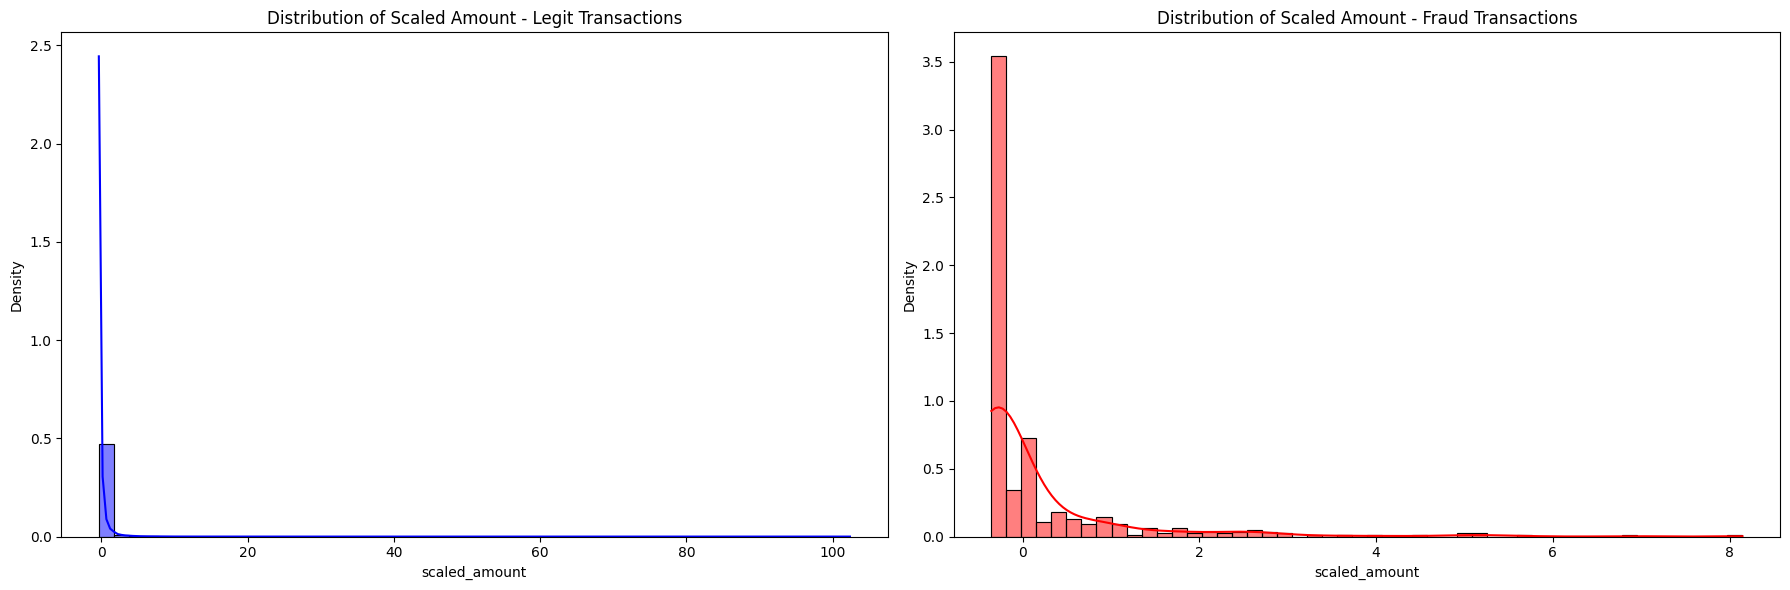

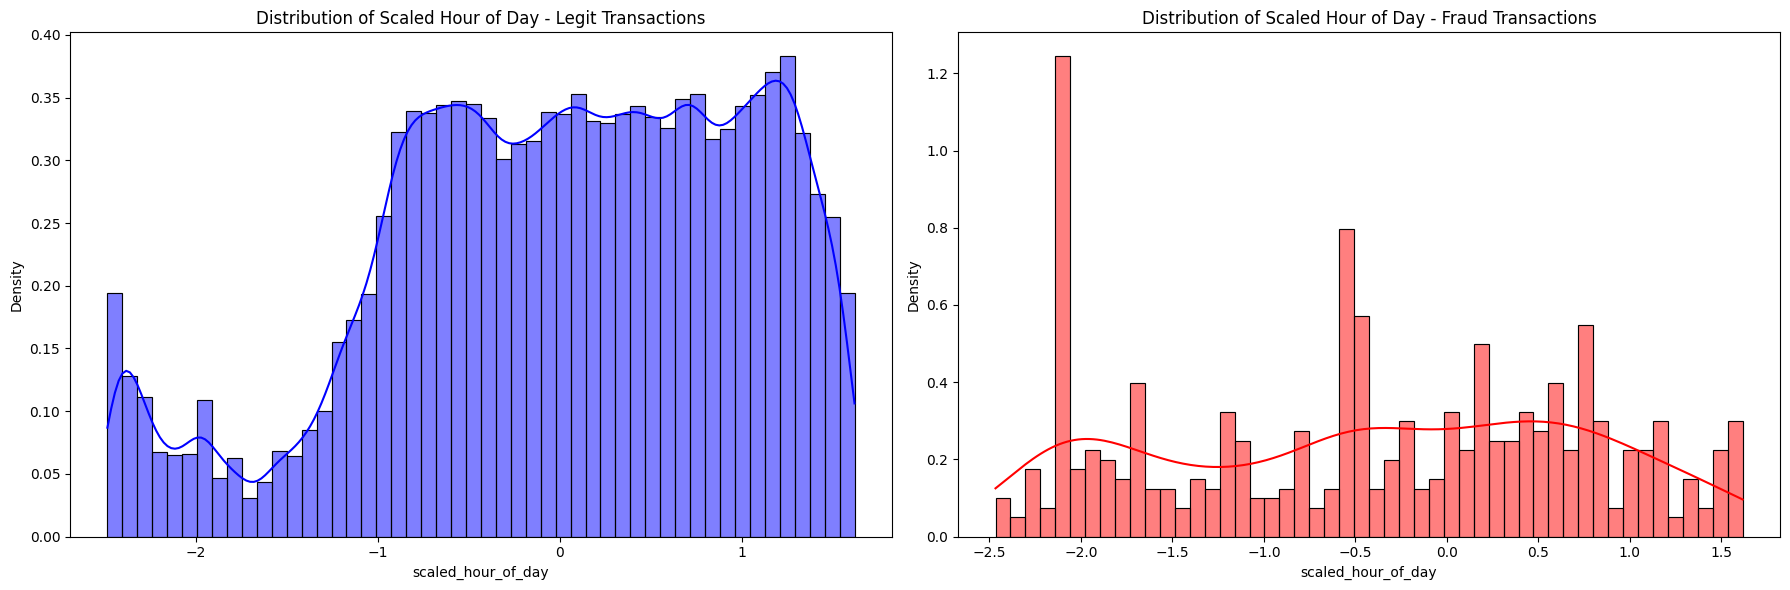

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Engineering: 'Time' to 'hour_of_day'
# Convert time in seconds to hours
df['hour_of_day'] = (df['Time'] / 3600) % 24

# Scaling 'Amount' and 'hour_of_day'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_hour_of_day'] = scaler.fit_transform(df['hour_of_day'].values.reshape(-1, 1))

# Display the first few rows with new features
display(df[['Time', 'hour_of_day', 'scaled_hour_of_day', 'Amount', 'scaled_amount', 'Class']].head())

print(f"------------------------Visualize---------------------------------------------")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.histplot(df[df['Class'] == 0]['scaled_amount'], ax=ax1, color='blue', stat='density', kde=True, bins=50)
ax1.set_title('Distribution of Scaled Amount - Legit Transactions')
sns.histplot(df[df['Class'] == 1]['scaled_amount'], ax=ax2, color='red', stat='density', kde=True, bins=50)
ax2.set_title('Distribution of Scaled Amount - Fraud Transactions')
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.histplot(df[df['Class'] == 0]['scaled_hour_of_day'], ax=ax1, color='blue', stat='density', kde=True, bins=50)
ax1.set_title('Distribution of Scaled Hour of Day - Legit Transactions')
sns.histplot(df[df['Class'] == 1]['scaled_hour_of_day'], ax=ax2, color='red', stat='density', kde=True, bins=50)
ax2.set_title('Distribution of Scaled Hour of Day - Fraud Transactions')
plt.tight_layout()
plt.show()

Insight:

scaled Amount:

1. Most transactions — whether legit or fraud — occur at low amounts.

2. The red fraud curve is narrower and more concentrated near the lower end of the scale -> suggests that fraudulent transactions tend to be small — possibly to avoid detection.

3. The blue legit curve has a longer tail, indicating that high-value transactions are more common among legitimate users. This could mean fraudsters avoid large amounts to stay under the radar.

scaled time:

The blue curve (Class 0) shows a strong peak between scaled hours -1 and +1, which corresponds to a specific time window during the day -> suggests that most legitimate transactions happen during regular business hours.

The red curve (Class 1) is flatter and more spread out, with peaks around scaled hours -2, -0.5, and +0.5 -> implies that fraudulent activity is less predictable and may occur at odd hours, such as late night or early morning.


**Implication for modeling**

Amount alone is not a strong linear predictor, but:

You can bin Amount into categories (e.g., small, medium, large) to capture fraud patterns.

You can interact Amount with Time (e.g., large transaction at odd hour) for better signals.

Consider log transformation to reduce skewness and improve model sensitivity.



**Prepare the features (X) and the target variable (y).**

X = all V features, scaled_amount, and scaled_hour_of_day as our predictive features and

y = 'Class' as our target.

The original 'Time' and 'Amount' columns will be dropped as we are using their scaled and engineered versions.

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Time', 'Amount', 'Class', 'hour_of_day'])
y = df['Class']

# Display the shapes of X and y
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# Display the first few rows of X and y to confirm
print("\nFirst 2 rows of features (X):")
display(X.head(2))
print("\nFirst 2 rows of target (y):")
display(y.head(2))

Shape of features (X): (284807, 30)
Shape of target (y): (284807,)

First 2 rows of features (X):


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_hour_of_day
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-2.486373
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-2.486373



First 2 rows of target (y):


,Class
0,0
1,0


**Splitting into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
X_train.shape, X_test.shape, y_train.mean(), y_test.mean()


# The dataset has ~284,807 rows total. 75% → ~213,605 rows in training. 25% → ~71,202 rows in testing.
# stratified sampling worked — the fraud ratio is preserved in both sets. Fraud rate (~0.173%) is consistent in both sets.

((213605, 30),
 (71202, 30),
 np.float64(0.0017274876524425926),
 np.float64(0.0017274795651807534))

### Train–test split validation

Here we split the dataset into training and test sets using a stratified strategy to ensure that the class imbalance is preserved. The resulting shapes confirm that approximately 75% of the data is used for training and 25% for testing, which is consistent with our initial choice.

By comparing the mean value of the target variable in both sets, we can observe that the fraud rate remains almost identical in the training and test data. This confirms that stratified sampling worked as expected and ensures that model evaluation will be fair and representative of the original data distribution.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# In the current X, these are 'scaled_amount' and 'scaled_hour_of_day', which were already scaled.
# Applying StandardScaler again here is functionally redundant given the current state of X,
# but the ColumnTransformer's syntax requires a transformer object.
num_cols = ['scaled_amount', 'scaled_hour_of_day']

# ColumnTransformer for scaling Amount and Time only
preprocess = ColumnTransformer(
    transformers=[
        ('scaler_amt_time', StandardScaler(), num_cols),
    ],
    remainder='passthrough'  # keep V1..V28 as-is
)

# For reference, remember the final feature order after transformation:
# The ColumnTransformer places transformed columns first, then passes through remaining columns.
# So, the order will be the columns in num_cols, followed by other columns in X that are not in num_cols.
feature_order = num_cols + [c for c in X.columns if c not in num_cols]
print('Transformed feature order (first few):', feature_order[:10], '...', len(feature_order), 'features total')

Transformed feature order (first few): ['scaled_amount', 'scaled_hour_of_day', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'] ... 30 features total


**Baseline Model — Random Forest**

We start with a reasonably sized forest and class_weight='balanced' to address class imbalance.

Evaluate with ROC-AUC and Average Precision (PR-AUC); inspect confusion matrix and a basic report at the default threshold (0.5).

Keeping it simple for now so no hyperparameter search yet (that comes in later stages).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)

pipe = Pipeline(steps=[
    ('prep', preprocess),
    ('rf', rf)
])

pipe.fit(X_train, y_train)

# Probabilities for curves & metrics
proba_test = pipe.predict_proba(X_test)[:, 1]
roc = roc_auc_score(y_test, proba_test)
ap = average_precision_score(y_test, proba_test)
print(f'ROC-AUC: {roc:.4f}')
print(f'Average Precision (PR-AUC): {ap:.4f}')

# Default-threshold predictions
y_pred = (proba_test >= 0.5).astype(int)
print('\nClassification report @ threshold=0.50:')
print(classification_report(y_test, y_pred, digits=4))

ROC-AUC: 0.9485
Average Precision (PR-AUC): 0.8437

Classification report @ threshold=0.50:
              precision    recall  f1-score   support

           0     0.9995    1.0000    0.9997     71079
           1     0.9674    0.7236    0.8279       123

    accuracy                         0.9995     71202
   macro avg     0.9835    0.8618    0.9138     71202
weighted avg     0.9995    0.9995    0.9994     71202



### Random Forest – Evaluation results (threshold = 0.50)

Here we can observe that the Random Forest achieves strong global performance, with a high ROC-AUC, which indicates that the model is effective at ranking fraudulent transactions above normal ones across different thresholds. The PR-AUC (average precision) is also high, which is particularly important in this context because it reflects performance on the minority class under extreme imbalance.

Looking at the classification report at the default threshold of 0.50, we see that precision for the fraud class is very high, meaning that when the model flags a transaction as fraud, it is usually correct. However, recall is noticeably lower than precision, which means that a significant portion of fraudulent transactions are still missed at this operating point. This result suggests that the model is already much more robust than the previous baselines, but the decision threshold will likely need to be tuned depending on whether we prioritize catching more fraud (higher recall) or reducing false alarms (higher precision).


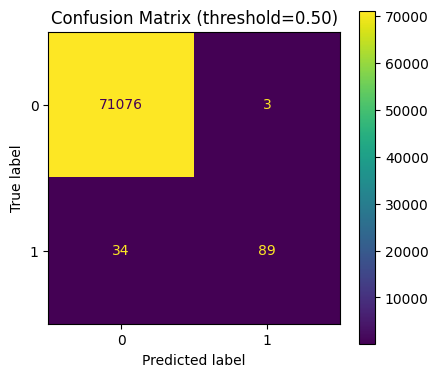

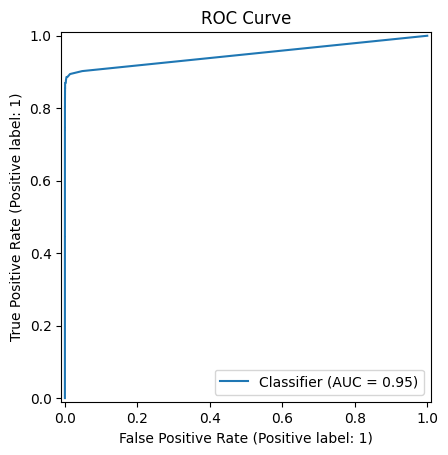

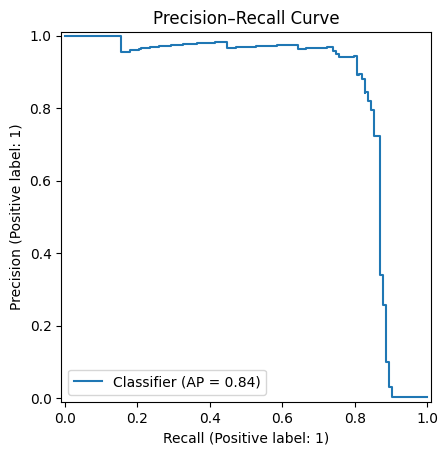

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Confusion matrix
fig, ax = plt.subplots(figsize=(4.5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, values_format='d')
ax.set_title('Confusion Matrix (threshold=0.50)')
plt.tight_layout()
plt.show()

# Curves
RocCurveDisplay.from_predictions(y_test, proba_test)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, proba_test)
plt.title('Precision–Recall Curve')
plt.show()

Insight:

1. TP 89 = Fraud correctly detected
FN 34 = Fraud missed by model
TN 71076 = Legitimate transactions correctly classified
FP 3 = Legitimate transactions wrongly flagged as fraud

2. AUC = 0.95 → excellent overall separability between fraud and legit.

The curve is close to the top-left corner → high true positive rate with low false positive rate.

model is very good at ranking transactions by fraud likelihood.

ROC-AUC is strong, but not enough alone — especially in imbalanced datasets.

3. Average Precision (PR-AUC) = 0.84 → very good performance under class imbalance.

The curve shows a strong balance between precision and recall.

Takeaways:
PR-AUC is more meaningful than ROC-AUC in fraud detection.

**Your model maintains high precision even as recall increases → ideal for minimizing false alarms while catching fraud.**



In [ ]:
# Save model
import joblib
joblib.dump(pipe, "rf_fraud_baseline.joblib")

['rf_fraud_baseline.joblib']

**XGBoost**

Training XGBoost with GridSearch...
Fitting 3 folds for each of 2 candidates, totalling 6 fits

Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': np.float64(577.8753387533875)}
Best CV recall: 0.8753
XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.20      0.88      0.33       123

    accuracy                           0.99     71202
   macro avg       0.60      0.94      0.66     71202
weighted avg       1.00      0.99      1.00     71202


ROC-AUC: 0.9784
PR-AUC: 0.7657


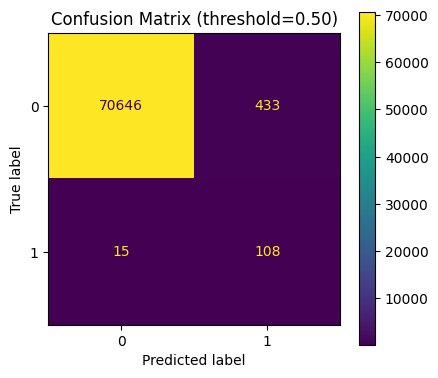

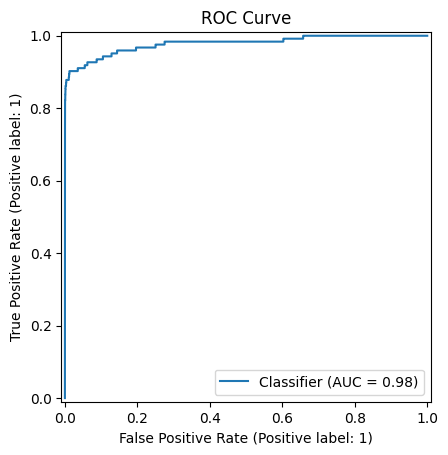

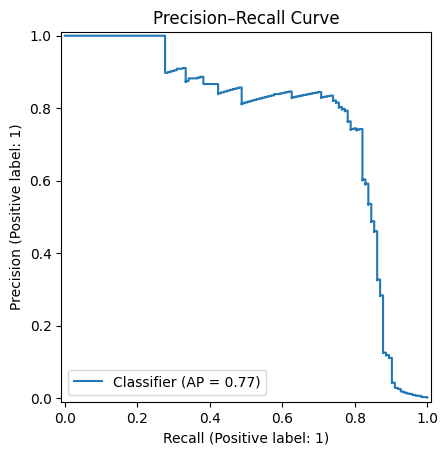

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Hyperparameter tuning for XGBoost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_params = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'scale_pos_weight': [scale_pos_weight]
}

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='recall', n_jobs=-1, verbose=1)

print("Training XGBoost with GridSearch...")
xgb_grid.fit(X_train, y_train)

print(f"\nBest params: {xgb_grid.best_params_}")
print(f"Best CV recall: {xgb_grid.best_score_:.4f}")

# Evaluate XGBoost
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)
y_pred_proba_xgb = xgb_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
print(f"PR-AUC: {pr_auc_xgb:.4f}")


# Confusion matrix
fig, ax = plt.subplots(figsize=(4.5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=ax, values_format='d')
ax.set_title('Confusion Matrix (threshold=0.50)')
plt.tight_layout()
plt.show()

# Curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba_xgb)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_xgb)
plt.title('Precision–Recall Curve')
plt.show()

Insight:

1.

Recall is high: 108 out of 123 frauds detected → ~88% recall.

Precision is lower: 433 false alarms → only ~20% of flagged frauds are truly fraud.

Compared to Random Forest:

XGBoost catches more fraud (higher recall)

But raises more false alarms (lower precision)


2. ROC Curve (AUC = 0.98)
Excellent separability between fraud and legit.

Higher than Random Forest’s AUC (0.95) → XGBoost ranks fraud likelihood better.


3. Precision–Recall Curve (PR-AUC = 0.77)
Slightly lower than Random Forest’s PR-AUC (0.84).

Indicates that while XGBoost is better at recall, it sacrifices precision.

**Takeaways:**

XGBoost is aggressive: catches more fraud but flags more legit transactions.

Random Forest is conservative: fewer false alarms, but misses more fraud.

**Gradient Boosting: in fraud detection:Better recall than Random Forest.
More precision than XGBoost.**

It’s another powerful tree-based ensemble method, like Random Forest and XGBoost.

Builds trees sequentially, each one correcting the errors of the previous.

Focuses on hard-to-classify examples, making it good for subtle patterns.

Can be tuned to balance precision vs recall, especially in imbalanced datasets.
Gradient Boosting will likely sit between Random Forest and XGBoost:

Learns from residuals → good for rare fraud signals

Feature importance and SHAP values are easy to extract



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [100],         # fewer trees → much faster
    'max_depth': [2],              # shallow trees → quick training
    'learning_rate': [0.2],        # larger step size → fewer trees needed
    'subsample': [0.8]             # keep stochastic element
    # Removed 'colsample_bytree' and 'scale_pos_weight' as they are not parameters for GradientBoostingClassifier
    # 'n_jobs' and 'random_state' are typically set in GridSearchCV or the estimator constructor, not in gb_params for GridSearch
}

# Initialize GradientBoostingClassifier with random_state for reproducibility
gb = GradientBoostingClassifier(random_state=42)

gb_grid = GridSearchCV(gb, gb_params, cv=3, scoring='recall', n_jobs=-1, verbose=1)

print("Training Gradient Boosting with GridSearch...")
gb_grid.fit(X_train, y_train)

print(f"\nBest params: {gb_grid.best_params_}")
print(f"Best CV recall: {gb_grid.best_score_:.4f}")

# Predict and Evaluate using Gradient Boosting
y_pred_gb = gb_grid.best_estimator_.predict(X_test)
y_pred_proba_gb = gb_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_pred_proba_gb)
pr_auc_gb = auc(recall_gb, precision_gb)
print(f"PR-AUC: {pr_auc_gb:.4f}")

Training Gradient Boosting with GridSearch...
Fitting 3 folds for each of 1 candidates, totalling 3 fits

Best params: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}
Best CV recall: 0.4499
Gradient Boosting Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.76      0.53      0.62       123

    accuracy                           1.00     71202
   macro avg       0.88      0.76      0.81     71202
weighted avg       1.00      1.00      1.00     71202


ROC-AUC: 0.6059
PR-AUC: 0.5229


### Gradient Boosting – Evaluation results

Here we can observe that Gradient Boosting produces mixed results on this dataset. On one hand, the model achieves relatively high precision for the fraud class, meaning that when a transaction is flagged as fraudulent, it is often correct. However, recall remains moderate, indicating that a significant portion of fraudulent transactions are still missed. This behavior is consistent with the relatively low best cross-validated recall obtained during grid search.

More importantly, the ROC-AUC and PR-AUC scores are surprisingly low compared to the other models tested. This indicates that the model struggles to properly rank fraudulent transactions above normal ones across different thresholds. Despite good-looking accuracy and class-wise metrics at the default threshold, these global metrics reveal that Gradient Boosting is not well adapted to the extreme imbalance and complexity of this dataset. Overall, this model appears less robust than Random Forest or XGBoost for credit card fraud detection.


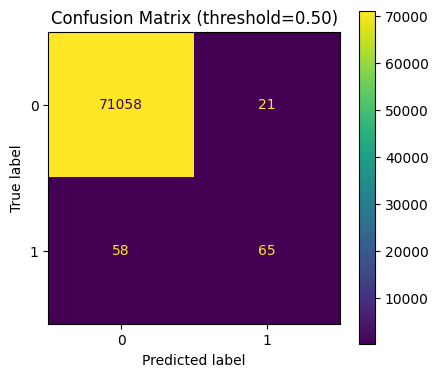

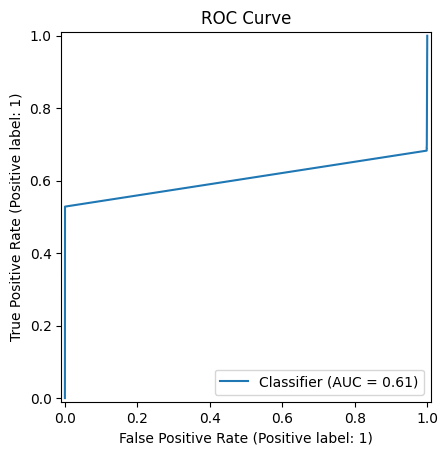

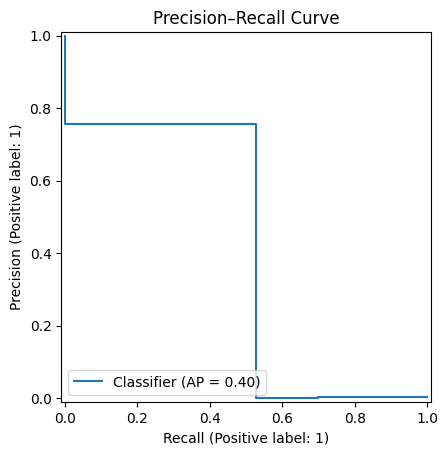

In [ ]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(4.5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, ax=ax, values_format='d')
ax.set_title('Confusion Matrix (threshold=0.50)')
plt.tight_layout()
plt.show()

# Curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba_gb)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_gb)
plt.title('Precision–Recall Curve')
plt.show()

### Gradient Boosting – Confusion matrix and curve analysis

Here we can clearly observe that, at the default threshold of 0.50, the Gradient Boosting model is extremely conservative in predicting fraud. The confusion matrix shows very few false positives, which explains the high precision for the fraud class. However, this comes at the expense of recall: a large number of fraudulent transactions are incorrectly classified as normal, meaning that many fraud cases are missed.

The ROC curve further highlights this limitation, with an AUC close to random performance. This indicates that the model has a weak ability to rank fraudulent transactions above normal ones across different thresholds. The Precision–Recall curve reinforces this observation, showing low average precision and unstable behavior as recall increases. Overall, these results confirm that Gradient Boosting, in this configuration, is not well suited for this highly imbalanced fraud detection task and does not provide a satisfactory trade-off between detection and false alerts.


LightGBM:

1. Make Gradient Boosting Better?

Tune hyperparameters more aggressively

Increase n_estimators to 300–500 (with early stopping).
Try learning_rate=0.05 or 0.1 — not too small.
Use max_depth=3–5 for balance.

2. Switch to LightGBM

It’s a faster, more scalable version of Gradient Boosting.
Handles imbalance better and supports GPU.



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Hyperparameter tuning for LightGBM
lgb_params = {
    'n_estimators': [100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 7],
    'num_leaves': [31],
    'class_weight': ['balanced']
}

lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=3, scoring='recall', n_jobs=-1, verbose=1)

print("Training LightGBM with GridSearch...")
lgb_grid.fit(X_train, y_train)

print(f"\nBest params: {lgb_grid.best_params_}")
print(f"Best CV recall: {lgb_grid.best_score_:.4f}")


# Evaluate LightGBM
y_pred_lgb = lgb_grid.best_estimator_.predict(X_test)
y_pred_proba_lgb = lgb_grid.best_estimator_.predict_proba(X_test)[:, 1]

print("LightGBM Results:")
print(classification_report(y_test, y_pred_lgb))
print(f"\nROC-AUC: {roc_auc_score(y_test, y_pred_proba_lgb):.4f}")

precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_pred_proba_lgb)
pr_auc_lgb = auc(recall_lgb, precision_lgb)
print(f"PR-AUC: {pr_auc_lgb:.4f}")

Training LightGBM with GridSearch...
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best params: {'class_weight': 'balanced', 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 31}
Best CV recall: 0.8374
LightGBM Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71079
           1       0.14      0.83      0.24       123

    accuracy                           0.99     71202
   macro avg       0.57      0.91      0.62     71202
weighted avg       1.00      0.99      0.99     71202


ROC-AUC: 0.9655
PR-AUC: 0.7372


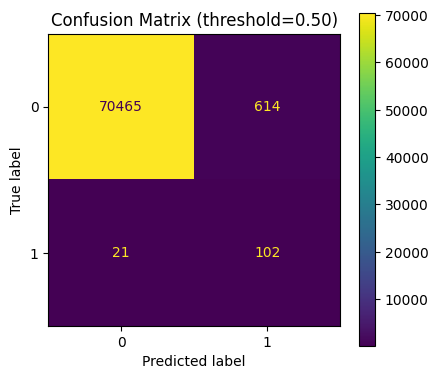

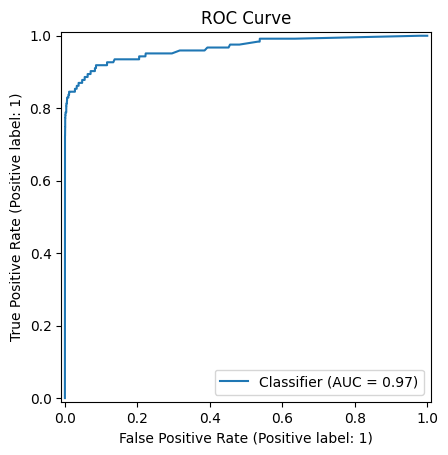

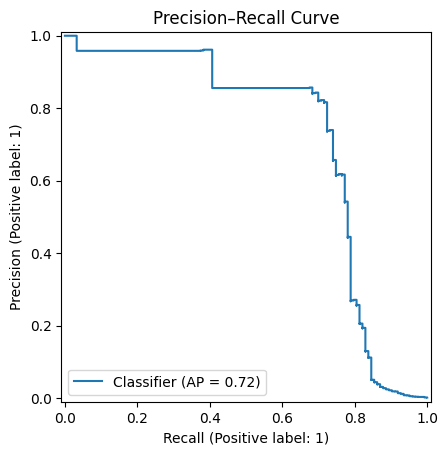

In [ ]:
# Confusion matrix
fig, ax = plt.subplots(figsize=(4.5, 4))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgb, ax=ax, values_format='d')
ax.set_title('Confusion Matrix (threshold=0.50)')
plt.tight_layout()
plt.show()

# Curves
RocCurveDisplay.from_predictions(y_test, y_pred_proba_lgb)
plt.title('ROC Curve')
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_lgb)
plt.title('Precision–Recall Curve')
plt.show()

### LightGBM – Evaluation results and comparison with previous models

Here we can observe that LightGBM provides a clear improvement over the simpler boosting methods and single-tree models explored earlier. Compared to Gradient Boosting, the ROC-AUC and PR-AUC are significantly higher, indicating that LightGBM is much more effective at ranking fraudulent transactions above normal ones across different thresholds. This confirms that histogram-based boosting and leaf-wise tree growth are better suited to the complexity of this dataset.

When compared to Random Forest and XGBoost, LightGBM shows a similar overall discriminative ability, with a high ROC-AUC and a solid PR-AUC. However, the confusion matrix reveals that this performance comes with a strong bias toward recall: most fraud cases are detected, but at the cost of a large number of false positives. As a result, precision for the fraud class remains low, even though recall is high. Overall, LightGBM confirms the trend observed previously: more advanced ensemble models clearly outperform baseline approaches, but threshold tuning or cost-sensitive optimization is still required to achieve an operationally acceptable balance between fraud detection and false alerts.


**SUMMARY OF ALL MODELS**

In [ ]:
# Summary of all models
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Gradient Boosting', 'LightGBM'],
    'PR-AUC': [ap, pr_auc_xgb, pr_auc_gb, pr_auc_lgb],
    'ROC-AUC': [
        roc_auc_score(y_test, proba_test),
        roc_auc_score(y_test, y_pred_proba_xgb),
        roc_auc_score(y_test, y_pred_proba_gb),
        roc_auc_score(y_test, y_pred_proba_lgb)
    ]
})

results = results.sort_values('PR-AUC', ascending=False)
print(results.to_string(index=False))

            Model   PR-AUC  ROC-AUC
    Random Forest 0.843707 0.948464
          XGBoost 0.765715 0.978371
         LightGBM 0.737215 0.965544
Gradient Boosting 0.522863 0.605920


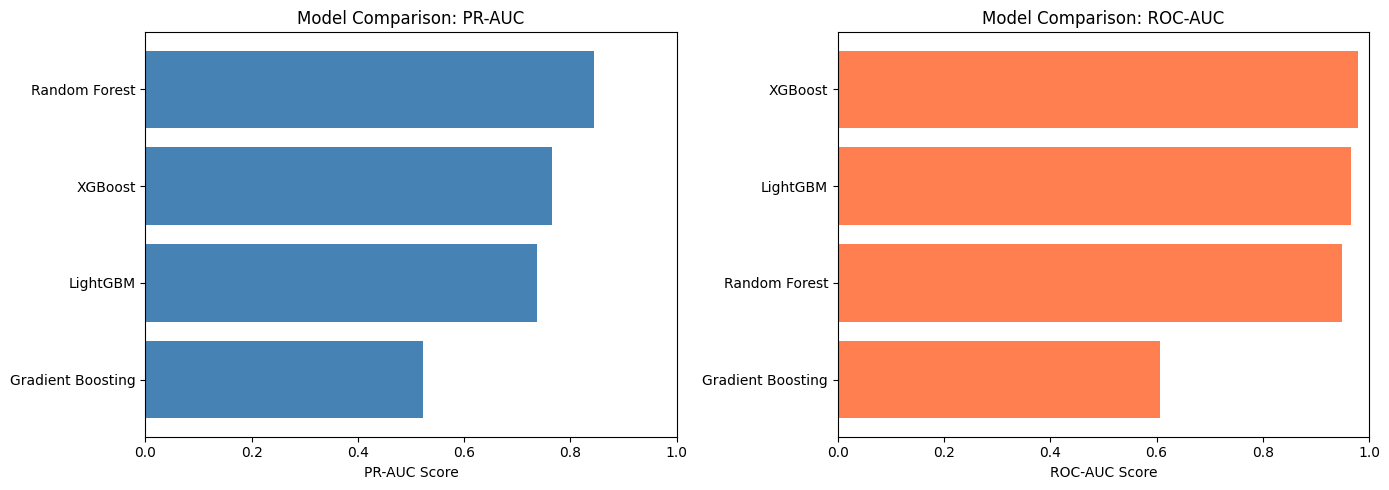

In [ ]:
# Visualize model comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

results_sorted = results.sort_values('PR-AUC')
ax[0].barh(results_sorted['Model'], results_sorted['PR-AUC'], color='steelblue')
ax[0].set_xlabel('PR-AUC Score')
ax[0].set_title('Model Comparison: PR-AUC')
ax[0].set_xlim(0, 1)

results_sorted = results.sort_values('ROC-AUC')
ax[1].barh(results_sorted['Model'], results_sorted['ROC-AUC'], color='coral')
ax[1].set_xlabel('ROC-AUC Score')
ax[1].set_title('Model Comparison: ROC-AUC')
ax[1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

**Chart 1: PR-AUC (Precision–Recall Area Under Curve)
Best for imbalanced datasets like fraud detection**

Focuses only on the positive class (fraud).

Tells us how well the model balances:

Precision → avoids false alarms.

Recall → catches actual frauds.

PR-AUC scores:
Random Forest -> excellent balance.

XGBoost -> good recall, lower precision.

rest 2 -> Lower performance'

**Chart 2: ROC-AUC (Receiver Operating Characteristic Area Under Curve): Fraud Risk scoring**

Measures overall separability between fraud and legit.
It’s strong at ranking transactions by fraud risk, making it useful for scoring systems.

Can look good even if the model misses most frauds.

Not ideal alone for imbalanced datasets.

ROC-AUC scores:

XGBoost → excellent ranking ability.

LightGBM - > very good
Random Forest → very good.

Gradient Boosting → poor.

Use XGBoost if you want to catch more frauds, even if it means more false alarms.


**Takeaways:**
Maximize fraud detection: XGBoost (high ROC-AUC, strong recall)

Minimize false alarms: Random Forest (high PR-AUC, strong precision)


### Global conclusion

In this project, we studied the problem of credit card fraud detection using a highly imbalanced dataset, where fraudulent transactions represent less than 0.2% of the data. In the first part of the work, we explored baseline and moderately complex models such as Logistic Regression and Decision Trees, both individually and within simple ensemble strategies. Although these models provided useful insights into the structure of the problem, their results were ultimately limited, either by low recall for the fraud class or by an excessive number of false positives.

In the second part, we moved toward more robust and specialized models designed to handle complex, non-linear patterns and severe class imbalance. By using Random Forest, XGBoost, and LightGBM, and by carefully selecting evaluation metrics such as ROC-AUC and PR-AUC, we were able to achieve significantly better performance. Despite the extreme imbalance of the dataset, these models demonstrated strong discriminative power and a clear improvement in fraud detection capability. Overall, this project shows that, with appropriate modeling choices, metric selection, and careful evaluation, it is possible to obtain meaningful and reliable results even on highly imbalanced real-world datasets like credit card fraud detection.
